In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

ZERO PADDING

In [8]:
def zero_pad(X, pad):
    """
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


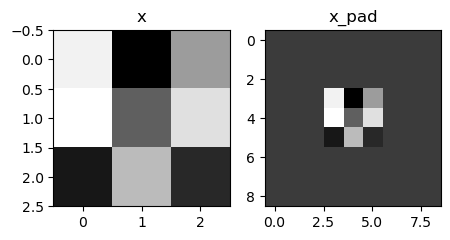

In [9]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

IMPLEMENTING CONV SINGLE STEP

In [10]:
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """
    s = a_slice_prev * W                      # element-wise product
    Z = np.sum(s)                             # sum over all elements
    Z = Z + float(b)                          # add bias     
    return Z

In [11]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


C:\Users\yadav\AppData\Local\Temp\ipykernel_14156\31009551.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = Z + float(b)                          # add bias


IMPLEMENTING CONV FORWARD

In [12]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
              numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape  # Retrieve dimensions from A_prev's shape
    (f, f, n_C_prev, n_C) = W.shape                   # Retrieve dimensions from W's shape
    stride = hparameters["stride"]                   # Retrieve information from "hparameters"
    pad = hparameters["pad"]
    
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1    # Compute the dimensions of the CONV output volume
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    Z = np.zeros((m, n_H, n_W, n_C))                    # Initialize the output volume Z with zeros
    A_prev_pad = zero_pad(A_prev, pad)                  # Create A_prev_pad by padding A_prev
    
    # Loop over the batch of training examples
    for i in range(m):
        a_prev_pad = A_prev_pad[i]                   # Select ith training example’s padded activation
        
        for h in range(n_H):                         # Loop over vertical axis
            vert_start = h * stride
            vert_end = vert_start + f
                
            for w in range(n_W):                     # Loop over horizontal axis
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range(n_C):                 # Loop over channels (= #filters)
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]       # Get the 3D slice
                    weights = W[:, :, :, c]           # Get filter and bias
                    biases = b[:, :, :, c]
            
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)     # Convolve the slice
    
    cache = (A_prev, W, b, hparameters)    #Save info in cache for bp
    
    return Z, cache


In [13]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)

Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


C:\Users\yadav\AppData\Local\Temp\ipykernel_14156\31009551.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = Z + float(b)                          # add bias


IMPLEMENTING MAX POOLING AND AVERAGE POOLING

In [14]:
def pool_forward(A_prev, hparameters, mode="max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- pooling mode: "max" or "average"
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters
    """

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape     # Retrieve dimensions from the input shape
    f = hparameters["f"]                                  # Retrieve hyperparameters
    stride = hparameters["stride"]

    n_H = int(1 + (n_H_prev - f) / stride)               # Compute dimensions of the output
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    A = np.zeros((m, n_H, n_W, n_C))                     # Initialize output matrix A
    
    for i in range(m):                         # loop over the batch
        a_prev = A_prev[i]
        for h in range(n_H):                   # vertical axis
            vert_start = h * stride
            vert_end = vert_start + f
            for w in range(n_W):               # horizontal axis
                horiz_start = w * stride
                horiz_end = horiz_start + f
                for c in range(n_C):           # channel axis
                    a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
                        
    cache = (A_prev, hparameters)      # Store input and hparameters for backprop
    
    return A, cache


In [15]:
# Case 1: stride of 1
print("CASE 1:\n")
np.random.seed(1)
A_prev_case_1 = np.random.randn(2, 5, 5, 3)
hparameters_case_1 = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev_case_1, hparameters_case_1, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A, cache = pool_forward(A_prev_case_1, hparameters_case_1, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])


# Case 2: stride of 2
print("\n\033[0mCASE 2:\n")
np.random.seed(1)
A_prev_case_2 = np.random.randn(2, 5, 5, 3)
hparameters_case_2 = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev_case_2, hparameters_case_2, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A, cache = pool_forward(A_prev_case_2, hparameters_case_2, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

CASE 1:

mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]

CASE 2:

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]


IMPLEMENTING CONV BACKWARD

In [16]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function.
    
    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), 
          numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values (A_prev, W, b, hparameters) from conv_forward()
    
    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """
    
    
    (A_prev, W, b, hparameters) = cache # Retrieve information from "cache"
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape  # Retrieve dimensions from A_prev's shape
    (f, f, n_C_prev, n_C) = W.shape     # Retrieve dimensions from W's shape
    
    stride = hparameters["stride"]
    pad = hparameters["pad"]

    (m, n_H, n_W, n_C) = dZ.shape    # Retrieve dimensions from dZ's shape
    
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))     # Initialize dA_prev, dW, db with the correct shapes                      
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))
    
    A_prev_pad = zero_pad(A_prev, pad)    # Pad A_prev and dA_prev
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):
        
        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):                   # loop over vertical axis of the output volume
            for w in range(n_W):               # loop over horizontal axis of the output volume
                for c in range(n_C):           # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice"
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]   # Slice a_prev_pad

                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]  # Update gradients
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
    
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :] if pad != 0 else da_prev_pad  # Unpad da_prev_pad
    
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db


In [19]:
np.random.seed(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
dA, dW, db = conv_backward(Z, cache_conv)

print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

dA_mean = 1.4524377775388075
dW_mean = 1.7269914583139097
db_mean = 7.839232564616838


C:\Users\yadav\AppData\Local\Temp\ipykernel_14156\31009551.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = Z + float(b)                          # add bias


POOLING LAYER - BACKWARD PASS
this function creates a "mask" matrix which keeps track of where the maximum of the matrix is. True (1) indicates the position of the maximum in X, the other entries are False (0)

In [22]:
def create_mask_from_window(x):
    """
    Creates a mask from an input matrix x, to identify the max entry of x.
    
    Arguments:
    x -- Array of shape (f, f)
    
    Returns:
    mask -- Array of the same shape as x, contains a True at the position 
            corresponding to the max entry of x.
    """    

    mask = (x == np.max(x))
    return mask


In [23]:
np.random.seed(1)
x = np.random.randn(2, 3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x = np.array([[-1, 2, 3],
              [2, -3, 2],
              [1, 5, -2]])

y = np.array([[False, False, False],
     [False, False, False],
     [False, True, False]])
mask = create_mask_from_window(x)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


AVERAGE POOLING- BACKWARD PASS

In [24]:
def distribute_value(dz, shape):
    """
    Distributes the input value in the matrix of dimension shape.
    
    Arguments:
    dz -- input scalar (the gradient from the next layer)
    shape -- tuple of integers (n_H, n_W), the shape of the output matrix 
             for which we want to distribute the value of dz.
    
    Returns:
    a -- Array of size (n_H, n_W) with each value equal to dz/(n_H*n_W)
    """    

    (n_H, n_W) = shape
    average = dz / (n_H * n_W)
    a = np.ones((n_H, n_W)) * average   # Create a matrix of average value
    return a


In [25]:
a = distribute_value(2, (2, 2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]


Putting it Together: Pooling Backward

In [26]:
def pool_backward(dA, cache, mode="max"):
    """
    Implements the backward pass of the pooling layer.
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains (A_prev, hparameters)
    mode -- pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """
    (A_prev, hparameters) = cache 
    stride = hparameters["stride"]
    f = hparameters["f"]
    
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (m, n_H, n_W, n_C) = dA.shape
    
    dA_prev = np.zeros_like(A_prev)
    
    for i in range(m):
        a_prev = A_prev[i]
        
        for h in range(n_H):                   # vertical axis
            for w in range(n_W):               # horizontal axis
                for c in range(n_C):           # channels
                
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    if mode == "max":
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c] # Slice from a_prev
                        mask = create_mask_from_window(a_prev_slice)                         # Create mask
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += mask * dA[i, h, w, c]   # Distribute the gradient only where the max was
                    
                    elif mode == "average":
                        da = dA[i, h, w, c]  # Get the gradient from output
                        shape = (f, f)      # Define filter shape
                        distributed = distribute_value(da, shape)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += distributed  # Add to dA_prev slice
                    
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev


In [27]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
print(A.shape)
print(cache[0].shape)
dA = np.random.randn(5, 4, 2, 2)

dA_prev1 = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev1[1,1] = ', dA_prev1[1, 1])  
print()
dA_prev2 = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev2[1,1] = ', dA_prev2[1, 1]) 


(5, 4, 2, 2)
(5, 5, 3, 2)
mode = max
mean of dA =  0.14571390272918056
dA_prev1[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev2[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]
